In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import keras
from sklearn.decomposition import PCA
import seaborn as sns
from keras.optimizers import Adam
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from keras.models import load_model

from sklearn.metrics import mean_absolute_error

Using TensorFlow backend.


In [2]:
def change_number(unique_lst):
    unique = pd.DataFrame(unique_lst).reset_index()
    indexes = unique['index']
    ids = unique[0]
    tuple_zip = list(zip(ids, indexes))
    dic = dict((x, y) for x, y in tuple_zip)
    reverse_dic = dict((y, x) for x, y in tuple_zip)
    return dic, reverse_dic

In [4]:
ratings = pd.read_csv('result_MF_Dinner.csv')

ratings

,user_id,user_count,recipe_id,review_count,rating
0,1533,102,10332,16,5
1,1533,102,10554,27,5
2,1533,102,14777,14,5
3,1533,102,14953,48,5
4,1533,102,16003,11,5
...,...,...,...,...,...
265382,2001836906,12,131018,610,5
265383,2001836906,12,156633,15,5
265384,2001836906,12,215414,164,5
265385,2001836906,12,282598,12,5


In [9]:
unique_users = list(ratings['user_id'].unique())
unique_recipe = list(ratings['recipe_id'].unique())

In [10]:

dic_user, dummy = change_number(unique_users)

ratings['user_id'] = ratings['user_id'].replace(dic_user)
                                                
                                                

In [11]:
dic_recipe, dic_recipe_reverse = change_number(unique_recipe)

ratings['recipe_id'] = ratings['recipe_id'].replace(dic_recipe)

### Scale values 

In [12]:
scaler = MinMaxScaler()
ratings['rating'] = ratings['rating'].values.astype(float)
rating_scaled = pd.DataFrame(scaler.fit_transform(ratings['rating'].values.reshape(-1,1)))
ratings['rating'] = rating_scaled

### Train test split 

In [13]:
train, test = train_test_split(ratings, test_size=0.2)

In [14]:
n_users = ratings.user_id.nunique()
n_recipe = ratings.recipe_id.nunique()

In [66]:
n_latent_factors_user = 20
n_latent_factors_recipe = 20

recipe_input = keras.layers.Input(shape=[1],name='Recipe')
recipe_embedding = keras.layers.Embedding(n_recipe + 1, n_latent_factors_recipe, name='Recipe-Embedding')(recipe_input)
recipe_vec = keras.layers.Flatten(name='Flatten-Recipes')(recipe_embedding)
recipe_vec = keras.layers.Dropout(0.2)(recipe_vec)


user_input = keras.layers.Input(shape=[1],name='User')
user_embedding = Embedding(n_users+1, n_latent_factors_user, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)
user_vec = keras.layers.Flatten(name='Flatten-Users')(user_embedding)
user_vec = keras.layers.Dropout(0.2)(user_vec)


concat = keras.layers.concatenate([recipe_vec, user_vec], axis=1, name='Concat')
concat_dropout = keras.layers.Dropout(0.2)(concat)
dense = keras.layers.Dense(200,name='FullyConnected')(concat)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(concat)
dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dense_2)
dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)


result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
adam = Adam(lr=0.005)
model = keras.Model([user_input, recipe_input], result)
model.compile(optimizer=adam,loss= 'mean_absolute_error')


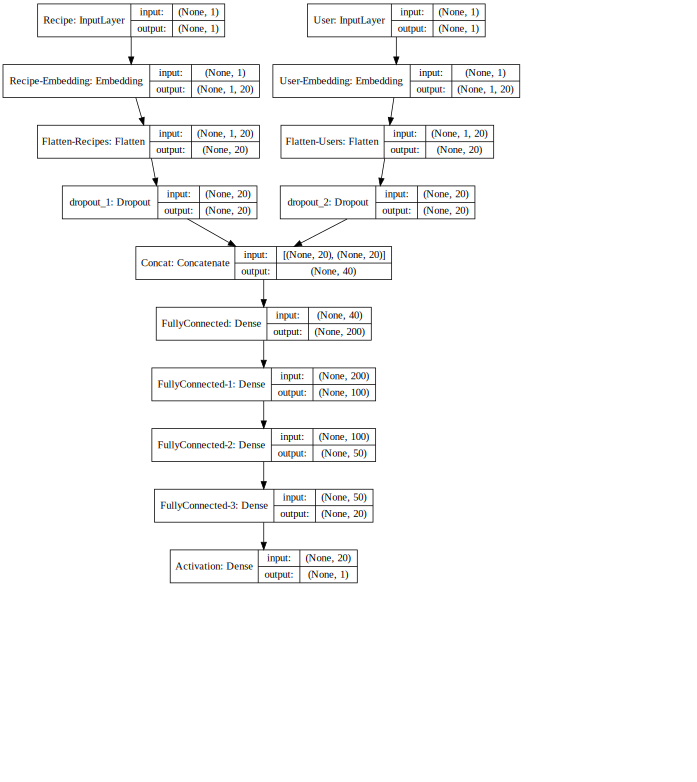

In [67]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [68]:
history = model.fit([train.user_id, train.recipe_id], train.rating, epochs=100, verbose=1)
model.save('NN_Dinner3.h5')

/Users/louise/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/100
212309/212309 [==============================] - 26s 120us/step - loss: 0.0826
Epoch 2/100
212309/212309 [==============================] - 24s 112us/step - loss: 0.0781
Epoch 3/100
212309/212309 [==============================] - 24s 111us/step - loss: 0.0756
Epoch 4/100
212309/212309 [==============================] - 23s 110us/step - loss: 0.0744
Epoch 5/100
212309/212309 [==============================] - 23s 110us/step - loss: 0.0786
Epoch 6/100
212309/212309 [==============================] - 23s 108us/step - loss: 0.1163
Epoch 7/100
212309/212309 [==============================] - 23s 109us/step - loss: 0.0853
Epoch 8/100
212309/212309 [==============================] - 23s 108us/step - loss: 0.0788
Epoch 9/100
212309/212309 [==============================] - 22s 105us/step - loss: 0.0780
Epoch 10/100
212309/212309 [==============================] - 22s 104us/step - loss: 0.0775
Epoch 11/100
212309/212309 [==============================] - 22s 103us/step - loss: 0.07

212309/212309 [==============================] - 21s 100us/step - loss: 0.0762
Epoch 90/100
212309/212309 [==============================] - 21s 99us/step - loss: 0.0762
Epoch 91/100
212309/212309 [==============================] - 21s 100us/step - loss: 0.0762
Epoch 92/100
212309/212309 [==============================] - 21s 100us/step - loss: 0.0762
Epoch 93/100
212309/212309 [==============================] - 21s 100us/step - loss: 0.0762
Epoch 94/100
212309/212309 [==============================] - 21s 99us/step - loss: 0.0762
Epoch 95/100
212309/212309 [==============================] - 21s 99us/step - loss: 0.0762
Epoch 96/100
212309/212309 [==============================] - 21s 101us/step - loss: 0.0762
Epoch 97/100
212309/212309 [==============================] - 21s 100us/step - loss: 0.0762
Epoch 98/100
212309/212309 [==============================] - 21s 99us/step - loss: 0.0762
Epoch 99/100
212309/212309 [==============================] - 21s 99us/step - loss: 0.0762
Epoch 

### Plot loss 

Text(0, 0.5, 'Train Error')

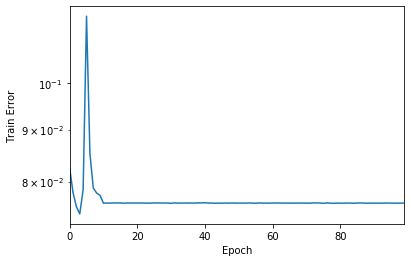

In [69]:
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

### MAE op test set 

In [70]:
y_hat = np.round(model.predict([test.user_id, test.recipe_id]),0)
y_true = test.rating

MAE = mean_absolute_error(y_true, y_hat)

#percentage_wrong = MAE/1 * 100
#percentage_wrong
MAE

0.07500282602961678

In [73]:
model2 = load_model('NN_Dinner.h5')

#y_hat = model2.predict([test.user_id.values[4], test.recipe_id.values[6]])
y_true = test.rating.values

#MAE = mean_absolute_error(y_true, y_hat)

#percentage_wrong = MAE/1 * 100
#percentage_wrong
MAE
np.unique(y_hat)

test.user_id.values[4]

/Users/louise/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


4715

### make predictions 

In [56]:
user_id = 4
recipe_id = 100

prediction = model2.predict([user_id, recipe_id])
prediction

AttributeError: 'int' object has no attribute 'ndim'

In [58]:
recipe_ids = ratings.recipe_id.unique()
user = np.array([user_id_changed for i in range(len(recipe_ids))])

predictions = model_dinner.predict([user, recipe_ids])
predictions = np.array([a[0] for a in predictions])
recommended_recipe_ids = (predictions).argsort()[:50]

print(predictions)
model_dinner.predict([user, recipe_ids])
recipe_ids

[1.0003266 1.0003266 1.0003266 ... 1.0003266 1.0003266 1.0003266]


array([    0,     1,     2, ..., 14628, 14629, 14630])